# HIGH FREQUENCY WORDS USING NLTK
Group 1: Diego Correa, Adam Gersowitz, Maria Ginorio
## Required Packages

In [1]:
import nltk
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import spacy
import requests

## Corpus

In [2]:

url='https://raw.githubusercontent.com/mgino11/Web_Analytics/main/headlines_corpus.txt'
data=requests.get(url).content

line=data.decode("utf-8","ignore")






## Data Preprocessing
### Cleaning

In [3]:
import re
line = re.sub(r'[^\w\s]', '',line).lower() # Block-not this characters: words + spaces-Block
#print(line)


### Tokenization

In [4]:
nltk.download("punkt")
nltk.download("wordnet")
txt_words = nltk.word_tokenize(line)
#txt_words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


### Stopwords

In [5]:
# from nltk.corpus import stopwords
nltk.download("stopwords")
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# tokenized and clean str
# remove stop words

corpus_final = []

In [7]:
for i in txt_words:
    if i not in stop_words:
        corpus_final.append(i)
        corpus_final.append(" ")

In [8]:
#"".join(corpus_final)

### Stemming

In [9]:
# # from nltk.stem import PorterStemmer
#
# stemmer = PorterStemmer()

In [10]:
# for word in corpus_final:
#     print(stemmer.stem(word))

### Lemmatization

In [11]:
lemmatizer  = WordNetLemmatizer()

In [12]:
#for word in corpus_final:
#    print(lemmatizer.lemmatize(word))

## Frequency Words
### Word Counter

In [13]:
from collections import Counter
word_counter = Counter(corpus_final)

### Unique Words
#### 2. How Many Unique words are in the corpus?

In [14]:
unique_words = len(set(word_counter))

In [15]:
print(unique_words)
len(corpus_final)/4

418


1793.5

There are 418 unique words in this coprus

#### 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

Approximatlely the first 116 unique most common words makes up about half of all the Corpora (1793)

In [16]:
most_common_words = word_counter.most_common()[:201]
#remove " " from the list of words
most_common_words=most_common_words[1:201]

#half of words with " " removed
l=len(corpus_final)/4
l

w=0
n=0

for word,num in most_common_words:
  w=w+1
  n=n+num
  if n > l:
    print(w)
    break


most_common_words[:116]


116


[('news', 140),
 ('nbc', 117),
 ('ago', 99),
 ('search', 39),
 ('us', 38),
 ('logo', 28),
 ('profile', 27),
 ('sign', 27),
 ('said', 27),
 ('6h', 23),
 ('justice', 22),
 ('cnn', 21),
 ('politics', 20),
 ('photos', 20),
 ('3h', 19),
 ('features', 18),
 ('today', 18),
 ('msnbc', 18),
 ('nightly', 18),
 ('help', 18),
 ('email', 18),
 ('stephen', 18),
 ('girl', 18),
 ('two', 18),
 ('4h', 18),
 ('made', 18),
 ('part', 18),
 ('called', 18),
 ('regional', 17),
 ('school', 17),
 ('2h', 16),
 ('weather', 15),
 ('videos', 15),
 ('tv', 15),
 ('media', 14),
 ('7h', 14),
 ('science', 13),
 ('tech', 13),
 ('video', 13),
 ('newsletters', 12),
 ('world', 11),
 ('east', 11),
 ('united', 11),
 ('first', 11),
 ('business', 11),
 ('opinion', 11),
 ('health', 11),
 ('better', 11),
 ('culture', 11),
 ('stay', 11),
 ('sports', 11),
 ('live', 11),
 ('films', 11),
 ('storm', 11),
 ('investigations', 11),
 ('follow', 11),
 ('top', 10),
 ('national', 10),
 ('stories', 10),
 ('terms', 10),
 ('privacy', 10),
 ('po

#### 4. Identify the 200 highest frequency words in this corpus

In [17]:
print(most_common_words)

[('news', 140), ('nbc', 117), ('ago', 99), ('search', 39), ('us', 38), ('logo', 28), ('profile', 27), ('sign', 27), ('said', 27), ('6h', 23), ('justice', 22), ('cnn', 21), ('politics', 20), ('photos', 20), ('3h', 19), ('features', 18), ('today', 18), ('msnbc', 18), ('nightly', 18), ('help', 18), ('email', 18), ('stephen', 18), ('girl', 18), ('two', 18), ('4h', 18), ('made', 18), ('part', 18), ('called', 18), ('regional', 17), ('school', 17), ('2h', 16), ('weather', 15), ('videos', 15), ('tv', 15), ('media', 14), ('7h', 14), ('science', 13), ('tech', 13), ('video', 13), ('newsletters', 12), ('world', 11), ('east', 11), ('united', 11), ('first', 11), ('business', 11), ('opinion', 11), ('health', 11), ('better', 11), ('culture', 11), ('stay', 11), ('sports', 11), ('live', 11), ('films', 11), ('storm', 11), ('investigations', 11), ('follow', 11), ('top', 10), ('national', 10), ('stories', 10), ('terms', 10), ('privacy', 10), ('policy', 10), ('ad', 10), ('choices', 10), ('sitemap', 10), ('2

## Plots

Once we have the frequency distribution in a counter we can use matplotlib to plot the frequency in log axis to check the shape of the distribution.

This graph is used usually to compare different datasets -
Flatter distribution =  larger vocabulary
Peak Distribution = restricted vocabulary (focused topic or specialized language)

### Plot 1 - Frequency
#### 5. Create a graph that shows the relative frequency of these 200 words.

In [18]:
import matplotlib.pyplot as plt



Text(0.5, 0, 'Word Rank')

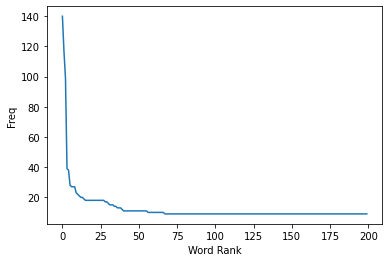

In [19]:
sorter_word_counts = sorted(list(word_counter.values()), reverse = True)
sorter_word_counts=sorter_word_counts[1:201]
plt.plot(sorter_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank")


#### 6. Does the observed relative frequency of these words follow Zipf’s law? Explain

The observed relative frequency seems to roughly follow Zipf's law. Zipf's law is the frequency of a given word is the inverse of its rank. So the most common word should occur 1/10 of all words. And following this the second most common word should occur 1/2 the frequency of the first word and the third most ocmmon word should occur 1/3 the frequency of the first and so on. The frequency of this corpus is not an exact following of Zipf's law but does loosely follow the pattern.

#### 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora."

Since we removed stopwords the words used in this corpus is going to be very different from all words in all corpora. This dataset is focused on news and has a lot of key words that are specific to this subject (i.e. news,cnn,nbc etc.) There is likely some cross over but given the speficity of this corpus it is unlikely to mirror all corpora.

### WordCLoud

In [20]:
from wordcloud import WordCloud

word_cloud = WordCloud(width=1000, height= 500).generate_from_frequencies(word_counter)

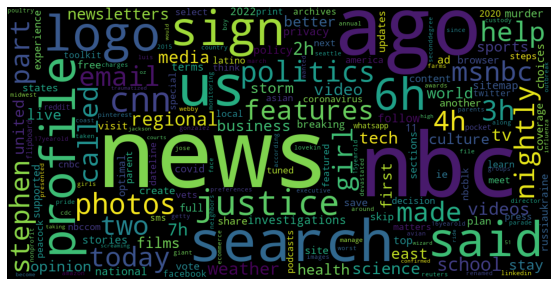

In [21]:
from matplotlib import rcParams

rcParams["figure.figsize"] = (10,5)
plt.imshow(word_cloud)
plt.axis("off")
plt.show()